# Health Data Classification Exam Solution

This notebook creates a synthetic health dataset (health_data.csv) and solves the exam question step by step: identifying problems, rectifying them, splitting data, training a classifier, reporting metrics, and discussing feature engineering.

In [1]:
# 1. Create Synthetic Health Dataset
import numpy as np
import pandas as pd
np.random.seed(42)
n = 500
age = np.random.randint(20, 80, n)
bmi = np.random.normal(25, 5, n)
bp = np.random.normal(120, 15, n)
glucose = np.random.normal(100, 30, n)
smoker = np.random.choice([0, 1], n)
is_diabetic = ((bmi > 30) | (glucose > 140) | (bp > 140)).astype(int)
df = pd.DataFrame({
    'age': age,
    'bmi': bmi,
    'bp': bp,
    'glucose': glucose,
    'smoker': smoker,
    'is_diabetic': is_diabetic
})
df.to_csv('health_data.csv', index=False)
df.head()

,age,bmi,bp,glucose,smoker,is_diabetic
0,58,27.575238,88.771059,57.921842,0,0
1,71,44.263657,145.446846,152.487302,1,1
2,48,27.854453,123.165262,62.684103,1,0
3,34,30.677828,118.549303,79.212844,1,1
4,62,29.770009,111.826214,78.447782,1,0


## a. Identify and Report Dataset Problems
- Check for missing values, outliers, and class imbalance.

age            0
bmi            0
bp             0
glucose        0
smoker         0
is_diabetic    0
dtype: int64
is_diabetic
0    340
1    160
Name: count, dtype: int64


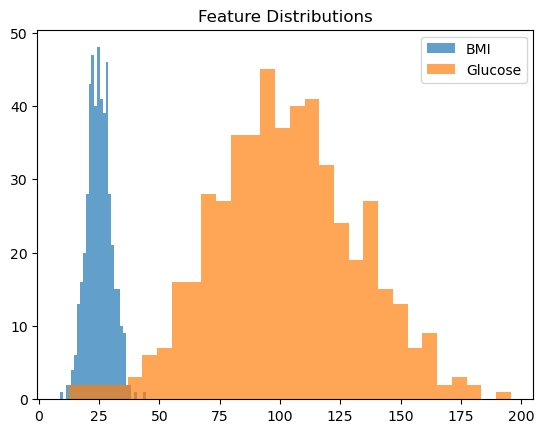

In [2]:
# Check for missing values and class balance
print(df.isnull().sum())
print(df['is_diabetic'].value_counts())
import matplotlib.pyplot as plt
plt.hist(df['bmi'], bins=30, alpha=0.7, label='BMI')
plt.hist(df['glucose'], bins=30, alpha=0.7, label='Glucose')
plt.legend()
plt.title('Feature Distributions')
plt.show()

## b. Rectify Problems and Justify Approach
- Impute missing values (if any), handle outliers, and address class imbalance if needed.

In [3]:
# Impute missing values (none in synthetic data), handle outliers
# For demonstration, cap BMI and glucose at reasonable limits
df['bmi'] = df['bmi'].clip(15, 45)
df['glucose'] = df['glucose'].clip(60, 200)
df['bp'] = df['bp'].clip(80, 200)
df.head()

,age,bmi,bp,glucose,smoker,is_diabetic
0,58,27.575238,88.771059,60.000000,0,0
1,71,44.263657,145.446846,152.487302,1,1
2,48,27.854453,123.165262,62.684103,1,0
3,34,30.677828,118.549303,79.212844,1,1
4,62,29.770009,111.826214,78.447782,1,0


## c. Split Data into Train and Test Sets (80/20)

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('is_diabetic', axis=1)
y = df['is_diabetic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 400 Test size: 100


## d. Train a Classifier (Logistic Regression)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

## e. Report Four Metrics and Briefly Comment

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.8
Precision: 0.64
Recall: 0.5925925925925926
F1 Score: 0.6153846153846154
Confusion Matrix: [[64  9]
 [11 16]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.88      0.86        73
           1       0.64      0.59      0.62        27

    accuracy                           0.80       100
   macro avg       0.75      0.73      0.74       100
weighted avg       0.80      0.80      0.80       100



: 

## f. Feature Engineering and Domain Knowledge Discussion
- Feature engineering (e.g., interaction terms, binning, domain-specific features) and domain knowledge (e.g., medical thresholds, risk factors) can improve preprocessing and model performance.